In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-plate-detection/annotations/Cars339.xml
/kaggle/input/car-plate-detection/annotations/Cars13.xml
/kaggle/input/car-plate-detection/annotations/Cars74.xml
/kaggle/input/car-plate-detection/annotations/Cars16.xml
/kaggle/input/car-plate-detection/annotations/Cars291.xml
/kaggle/input/car-plate-detection/annotations/Cars236.xml
/kaggle/input/car-plate-detection/annotations/Cars429.xml
/kaggle/input/car-plate-detection/annotations/Cars132.xml
/kaggle/input/car-plate-detection/annotations/Cars251.xml
/kaggle/input/car-plate-detection/annotations/Cars51.xml
/kaggle/input/car-plate-detection/annotations/Cars165.xml
/kaggle/input/car-plate-detection/annotations/Cars313.xml
/kaggle/input/car-plate-detection/annotations/Cars240.xml
/kaggle/input/car-plate-detection/annotations/Cars201.xml
/kaggle/input/car-plate-detection/annotations/Cars412.xml
/kaggle/input/car-plate-detection/annotations/Cars227.xml
/kaggle/input/car-plate-detection/annotations/Cars145.xml
/kaggle/input/car-

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.66 MiB | 23.20 MiB/s, done.
Resolving deltas: 100% (10983/10983), done.
/kaggle/working/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.4/617.4 kB 9.3 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO
yolo_model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 25.0MB/s]


In [4]:
objects = yolo_model('/kaggle/input/car-plate-detection/images/Cars0.png')


image 1/1 /kaggle/input/car-plate-detection/images/Cars0.png: 352x640 1 car, 230.0ms
Speed: 11.3ms preprocess, 230.0ms inference, 23.2ms postprocess per image at shape (1, 3, 352, 640)


In [5]:
objects

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

[0.4265308380126953, 1.7763614654541016, 492.8849182128906, 261.71051025390625, 0.8218486905097961, 2.0]


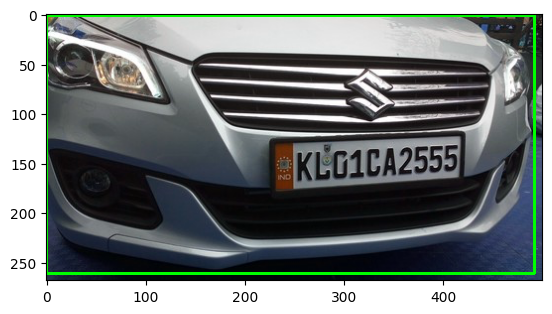

In [6]:
import matplotlib.pyplot as plt
import cv2
img = '/kaggle/input/car-plate-detection/images/Cars0.png'
img = cv2.imread(img)
plt.imshow(img)
color = (255, 0, 0) 
for object in objects[0].boxes.data.tolist():
    print(object)
    x1,y1,x2,y2,score,classes = object
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    plt.imshow(img)

In [7]:
import xml.etree.ElementTree as ET
tree = ET.parse('/kaggle/input/car-plate-detection/annotations/Cars0.xml')
root = tree.getroot()
for child in root:
    print(child.tag)

folder
filename
size
segmented
object


In [8]:
for child in root[4][5]:
    print(child.text)

226
125
419
173


In [9]:
values = []
for i in range(4):
    values.append(int(root[4][5][i].text))
values

[226, 125, 419, 173]

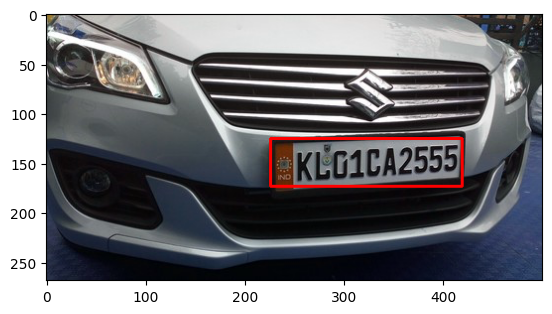

In [10]:
img = '/kaggle/input/car-plate-detection/images/Cars0.png'
img = cv2.imread(img)
color = (255, 0, 0) 
cv2.rectangle(img,values[:2],values[2:],color,2)
plt.imshow(img)

In [11]:
img.shape

(268, 500, 3)

In [72]:
import pandas as pd
txt_file = pd.DataFrame([values])

In [73]:
txt_file.to_csv('xgboost.txt', sep='\t', index=False)

In [74]:
pd.read_csv('/kaggle/working/yolov5/xgboost.txt',sep = '\t')

,0,1,2,3,4
0,0,226,125,419,173


In [79]:
def annotatons(file):
    tree = ET.parse(file)
    root = tree.getroot()
    values = []
    for i in range(4):
        values.append(int(root[4][5][i].text))
    

In [80]:
print(annotatons("/kaggle/input/car-plate-detection/annotations/Cars0.xml"))

[226, 125, 419, 173]


In [ ]:
yolo_model.train()

In [13]:
!git clone https://github.com/MuhammadMoinFaisal/Automatic_Number_Plate_Detection_Recognition_YOLOv8.git

Cloning into 'Automatic_Number_Plate_Detection_Recognition_YOLOv8'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 158 (delta 15), reused 31 (delta 14), pack-reused 122
Receiving objects: 100% (158/158), 6.48 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [14]:
!cd Automatic_Number_Plate_Detection_Recognition_YOLOv8

In [15]:
!pip install -e '.[dev]'


Obtaining file:///kaggle/working/yolov5
ERROR: file:///kaggle/working/yolov5 does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [17]:
!cd ultralytics/yolo/v8/detect

/bin/bash: line 0: cd: ultralytics/yolo/v8/detect: No such file or directory


In [20]:
!pip install gdown

In [21]:
!gdown "https://drive.google.com/uc?id=1dIyJooVaowaNUj0R1Q-HUnu-utiGsEj8&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1dIyJooVaowaNUj0R1Q-HUnu-utiGsEj8&confirm=t
To: /kaggle/working/yolov5/best.pt
100%|███████████████████████████████████████| 52.0M/52.0M [00:00<00:00, 141MB/s]


In [23]:
licence = YOLO("/kaggle/working/yolov5/best.pt")
results = licence('/kaggle/input/car-plate-detection/images/Cars0.png')


image 1/1 /kaggle/input/car-plate-detection/images/Cars0.png: 352x640 1 licence, 476.1ms
Speed: 1.7ms preprocess, 476.1ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


[224.8076934814453, 123.36775207519531, 415.8847961425781, 172.95089721679688, 0.9132171273231506, 0.0]


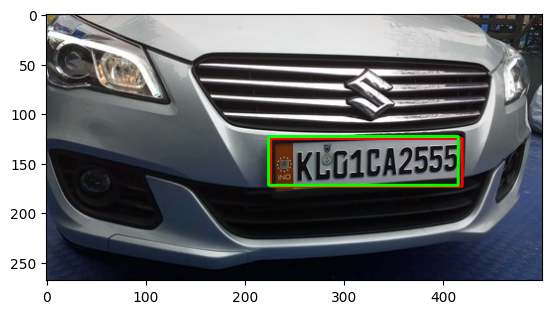

In [32]:
for object in results[0].boxes.data.tolist():
    print(object)
    x1,y1,x2,y2,score,classes = object
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    plt.imshow(img)

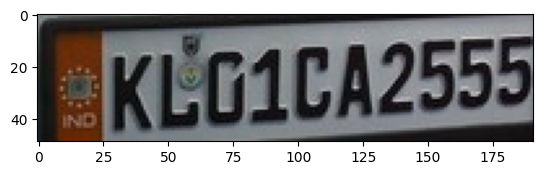

In [56]:
%matplotlib inline
img = cv2.imread("/kaggle/input/car-plate-detection/images/Cars0.png")
cropped_img = img[int(y1):int(y2),int(x1): int(x2),:]
plt.imshow(cropped_img)
plt.show()

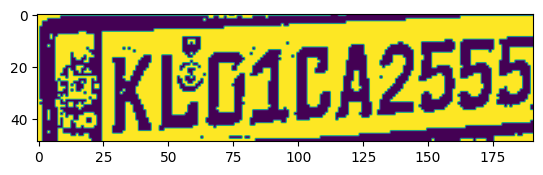

In [57]:
gray_img = cv2.cvtColor(cropped_img,cv2.COLOR_RGB2GRAY)
_,threshold_img = cv2.threshold(gray_img,64,255,cv2.THRESH_BINARY_INV)
th2 = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
plt.imshow(th3)
plt.show()

In [70]:
results = licence('/kaggle/input/car-plate-detection/images/Cars10.png')
for result in results[0].boxes.data.tolist():
    x1,y1,x2,y2,score,classes = result


image 1/1 /kaggle/input/car-plate-detection/images/Cars10.png: 384x640 1 licence, 493.9ms
Speed: 3.0ms preprocess, 493.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


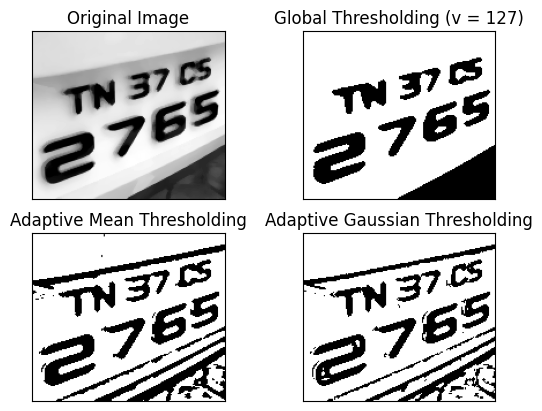

In [71]:
import cv2 as cv

img = cv.imread("/kaggle/input/car-plate-detection/images/Cars10.png",\
                cv.IMREAD_GRAYSCALE)
img = img[int(y1):int(y2),int(x1): int(x2)]
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [72]:
import pytesseract
text = pytesseract.image_to_string(th3)
# Print the extracted text
print(text)

In [75]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(th3,paragraph="False")

[[[-8, 15], [178, 15], [178, 144], [-8, 144]], 'TN37Cs 2765']

In [80]:
test = result[-1][-1]
licence_plate = test.upper().strip()
licence_plate

'TN37CS 2765'

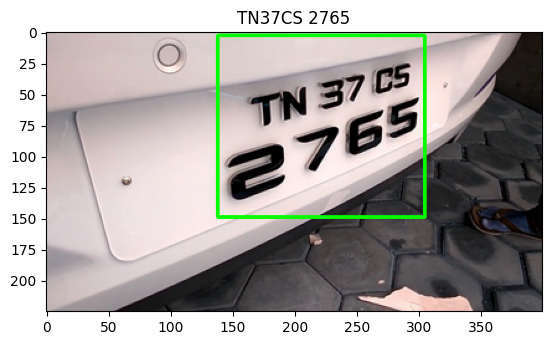

In [83]:
img = cv.imread("/kaggle/input/car-plate-detection/images/Cars10.png")
for object in results[0].boxes.data.tolist():

    x1,y1,x2,y2,score,classes = object
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    plt.title(license_plate)
    plt.imshow(img)